# Restaurant Reviews : Sentiment Analysis

<img src="sentiment.jpg" width="800" height="400">

## 1. Problem Statement
### Given a review by a Customer we have to determine whether it belongs to Positive review or Negative review
      Eg:1 
      i.e. Review 1 : Wow this place really gives me good vibe as well as the fish cury is also Awesome as always.
      Ans: Positive Review
      
      Eg:2
      i.e Review 2 : This Dish is not at all tasty as well as waitress was a little slow in service.
      Ans: Negative Review

### 1.1. Type of Machine Learning Problem

#### Determine Whether review is Positive / Negative i.e (Binary Classification)

     yi ---> 0 ---> Negative Review
     yi ---> 1 ---> Positive Review

### 2. Import Libraries and Load Datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    # lemmatize
from wordcloud import WordCloud, STOPWORDS
import string 

[nltk_data] Downloading package stopwords to C:\Users\Nihar
[nltk_data]     J\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Restaurant_Reviews.txt', delimiter='\t', quoting=3)

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
print('total shape',df.shape)
print('total columns',df.columns)
print('*'*50)
print(df.info())

total shape (1000, 2)
total columns Index(['Review', 'Liked'], dtype='object')
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


### 2.1 Attribute Information
     1: Review - Review given by User/Customer in Text format
     2: Liked -  Review liked based on sentiment i.e. binary (0,1)

## 3: Exploratory Data Analysis

### 3.1 Distribution of Output

In [5]:
df.head(2)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0


<AxesSubplot:xlabel='Liked'>

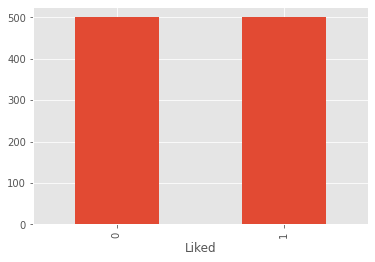

In [6]:
df.groupby('Liked')['Review'].count().plot.bar()

In [7]:
df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

#### Conclusion: Balanced Dataset

### 3.2 Plot Word Clouds
- Creating Word Cloud for Likes i.e (positive / negative reviews)
- We can observe the most frequent occuring words for negative / positive reviews

In [8]:
STOP_WORDS = stopwords.words('english')

In [9]:
stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.remove("not")
stopwords.remove("no")
stopwords.add(" ")

### Positive Review 

In [10]:
positive = df.Review[df['Liked'][df['Liked']==1].index]

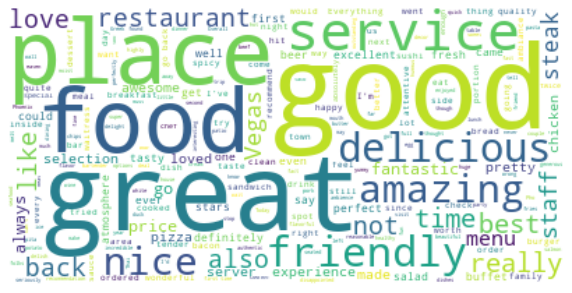

In [11]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(positive))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Review

In [12]:
negative = df.Review[df['Liked'][df['Liked']==0].index]

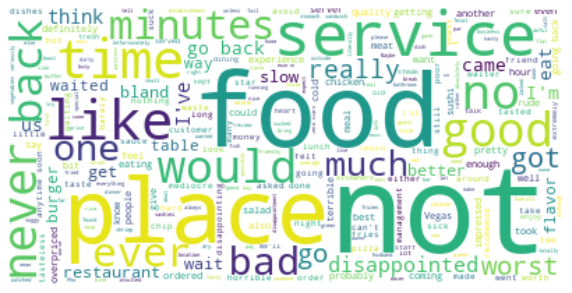

In [13]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(negative))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Conclusion: 
        In Positive : great, good, delicious,nice,amazing,friendly,... are repeated most of the time in given review
        In Negative: not, bad, worst,never ,.... are repeated most of time 

### 4. Text Preprocessing
- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

### 4.1.1 Expanding contractions

In [14]:
def text_preproces(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)
    
    return x    

In [15]:
def extract_features(df):
    df['Review'] = df['Review'].fillna("").apply(text_preproces)
    print("token features...")
    
    return df

In [16]:
df = extract_features(df)

token features...


In [17]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


### 4.1.2 Removal of URLs

In [18]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df.Review=df.Review.apply(remove_urls)

### 4.1.3 Removal of HTML tags

In [19]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df.Review=df.Review.apply(remove_html)

### 4.1.4 Tokenization of Data
-findall

findall() is probably the single most powerful function in the re module. Above we used re.search() to find the first match for a pattern. findall() finds *all* the matches and returns them as a list of strings, with each string representing one match.

#### Suppose we have a text with many email addresses
  str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

#### Here re.findall() returns a list of all the found email strings
  emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
  for email in emails:
    # do something with each found email string
    print email

In [20]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
df.Review=df.Review.apply(word_tokenize)

In [21]:
df.head()

,Review,Liked
0,"[wow, loved, this, place]",1
1,"[crust, is, not, good]",0
2,"[not, tasty, and, the, texture, was, just, nasty]",0
3,"[stopped, by, during, the, late, may, bank, ho...",1
4,"[the, selection, on, the, menu, was, great, an...",1


### 4.1.5 Removal of Stopwords

In [22]:
def remove_stopwords(lst):
    stop=stopwords
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

df.Review=df.Review.apply(remove_stopwords)

### 4.1.6 Removal of Punctuation Symbols

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in  string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
df.Review=df.Review.apply(remove_punctuations)

### 4.1.7 Removal of Numbers(digits)

In [25]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  string.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
df.Review=df.Review.apply(remove_numbers)

### 4.1.8 Lemmatization of Data

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
df.Review=df.Review.apply(lemmatzation)

In [28]:
df.Review[2]

['not', 'tasty', 'texture', 'nasty']

In [29]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

### Observation: 
         1: We have Expanded Contradictions by replacing text such as "%" as percent , "won't" as "will not" etc etc so                   that our text corpus will have some meaning.
         2: Removed Punctuations, Html tags, urls etc etc.
         3: Removed Stopwords except( no,not,... all negative words which may include in negative reviews)
         4: Lemmatiation for converting a 2 or more words having same meanings into single meaningful word.

## 5. Train Test Split

In [30]:
df.head(2)

,Review,Liked
0,"[wow, loved, place]",1
1,"[crust, not, good]",0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [32]:
df['Review'] = df["Review"].astype("str")

In [33]:
df.head()

,Review,Liked
0,"['wow', 'loved', 'place']",1
1,"['crust', 'not', 'good']",0
2,"['not', 'tasty', 'texture', 'nasty']",0
3,"['stopped', 'late', 'may', 'bank', 'holiday', ...",1
4,"['selection', 'menu', 'great', 'price']",1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test = train_test_split(df, test_size=0.2,stratify = df["Liked"])

#### What does Stratify = True in train test split does ?
    -So , it bascily does sampling in proper manner so that we get same amount of values in each sets , we can check it by [y_train.value_counts()] to check our output labels

In [36]:
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)

X_train.shape: (800, 2)
X_test.shape: (200, 2)


## 6. NLP Models
    1: TF-IDF
    2: Uni-gram, Bi-grams, N-grams
    3: Selecting max_features out of the model

## 6.1 TF-IDF

### Here i have created a small Blog explaining intution of TF-IDF : 
https://niharjamdar.medium.com/tf-idf-term-frequency-and-inverse-document-frequency-56a0289d2fb6

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer_tf = TfidfVectorizer(tokenizer=None,stop_words=None,max_df=0.80,max_features=500,lowercase=False,ngram_range=(1,2))

In [47]:
train_vectors = vectorizer_tf.fit_transform(X_train.Review)   # For train

In [48]:
test_vectors = vectorizer_tf.transform(X_test.Review)

In [49]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of train_vectors:',train_vectors.shape)
print('Shape of test_vectors:',test_vectors.shape)

Shape of X_train: (800, 2)
Shape of X_test: (200, 2)
Shape of train_vectors: (800, 500)
Shape of test_vectors: (200, 500)


#### What is max_df = .80?
max_df is used for removing data values that appear too frequently, also known as "corpus-specific stop words". For example: max_df = 0.50 means "It ignores terms that appear in more than 50% of the documents". max_df = 25 means "It ignores terms that appear in more than 25 documents"

In [50]:
vectorizer_tf.get_feature_names()

['absolutely',
 'also',
 'although',
 'always',
 'amazing',
 'ambiance',
 'another',
 'anytime',
 'anytime soon',
 'area',
 'around',
 'arrived',
 'asked',
 'ate',
 'atmosphere',
 'attentive',
 'authentic',
 'average',
 'avoid',
 'away',
 'awesome',
 'back',
 'back every',
 'bacon',
 'bad',
 'bar',
 'barely',
 'bartender',
 'bathroom',
 'bay',
 'bean',
 'beautiful',
 'beer',
 'best',
 'better',
 'biscuit',
 'bit',
 'bite',
 'bland',
 'boy',
 'break',
 'breakfast',
 'bring',
 'brought',
 'brunch',
 'buffet',
 'burger',
 'business',
 'came',
 'came back',
 'cant',
 'care',
 'check',
 'checked',
 'cheese',
 'chef',
 'chewy',
 'chicken',
 'chip',
 'clean',
 'close',
 'cocktail',
 'cold',
 'come',
 'come back',
 'coming',
 'coming back',
 'cooked',
 'cool',
 'could',
 'could not',
 'couple',
 'course',
 'cover',
 'crab',
 'crab leg',
 'crazy',
 'cream',
 'crispy',
 'crowd',
 'customer',
 'customer service',
 'cute',
 'damn',
 'dark',
 'day',
 'deal',
 'dealing',
 'decided',
 'definitely',
 

In [51]:
vectorizer_tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': False,
 'max_df': 0.8,
 'max_features': 500,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [52]:
X_train.head(2)

,Review,Liked
987,"['lacked', 'flavor', 'seemed', 'undercooked', ...",0
286,"['thing', 'went', 'wrong', 'burned', 'saganaki']",0


In [53]:
train_df = pd.DataFrame(train_vectors.toarray(),columns=vectorizer_tf.get_feature_names())
train_df = pd.concat([train_df,X_train['Liked'].reset_index(drop = True)],axis = 1)

train_df

,absolutely,also,although,always,amazing,ambiance,another,anytime,anytime soon,area,...,worst,worth,would,would not,wrong,year,yummy,zero,zero star,Liked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.636903,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.309884,0.37731,0.000000,0.0,0.0,0.0,0.0,0


In [54]:
test_df = pd.DataFrame(test_vectors.toarray(),columns=vectorizer_tf.get_feature_names())
test_df = pd.concat([test_df,X_test['Liked'].reset_index(drop = True)],axis = 1)

test_df

,absolutely,also,although,always,amazing,ambiance,another,anytime,anytime soon,area,...,worst,worth,would,would not,wrong,year,yummy,zero,zero star,Liked
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.652987,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.535894,0.0,0.0,0.0,0.0,0.0,0.0,0
196,0.0,0.0,0.0,0.0,0.000000,0.0,0.625362,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
197,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
198,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


# 7. Apply Machine Learning Models

In [56]:
X_train = train_df.drop(['Liked'],axis = 'columns')
y_train = train_df['Liked']

In [57]:
X_test = test_df.drop(['Liked'],axis = 'columns')
y_test = test_df['Liked']

## 7.1 Logistic Regression

### Here's my github link explaining Logistic Regression using sklearn :
https://github.com/nihar-max/logistic_regression_using_sklearn/blob/master/Logistic%20Regression%20Nihar.ipynb

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### Step 1: fit() func

In [87]:
clf_log = LogisticRegression(C=2,solver = "liblinear",penalty='l1',multi_class='ovr')
#For small datasets, ‘liblinear’ is a good choice
#‘liblinear’ and ‘saga’ also handle L1 penalty
clf_log.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
pred = clf_log.predict(X_test)

In [89]:
print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
first 20 predicted labels
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]


### Confusion Matrix

In [90]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

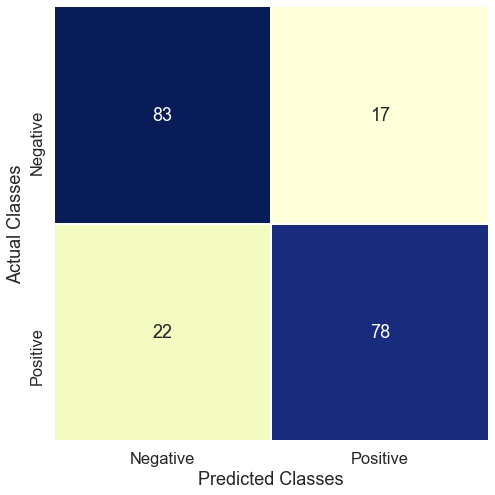

In [91]:
confusion_mat('YlGnBu')

#### Conclusion: In case of Confusion Matrix if we build a sensible model then we get higher values diagonally

### Precision , Recall ,F1-Score

In [92]:
print('\nClassification Report\n')
print(classification_report(y_test,pred))


Classification Report

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.82      0.78      0.80       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



#### Precision and Recall for class 0 i.e negative
    Precision : Out of all points which are predicted [yi^] to be class 0 there are 79% points are actually [yi] class0 
    Recall    : Out of all Points which are actually belongs to class 0 [yi] there are 83% points predicted to be class 0 [yi^]

### Accuracy , Error

In [112]:
a1 = round(accuracy_score(y_test,pred)*100,4)
e1 = round(100-accuracy_score(y_test,pred)*100,4)
print('Accuracy:',a1)
print('Error:',e1)

Accuracy: 80.5
Error: 19.5


##### Accuracy = [Number of Correctly classified points / Total number of points in Dtest]

##### Error = 1 - Accuracy

## 7.2 Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,y_train)
pred_dtg = dt_model.predict(X_test)

In [97]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred_dtg)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

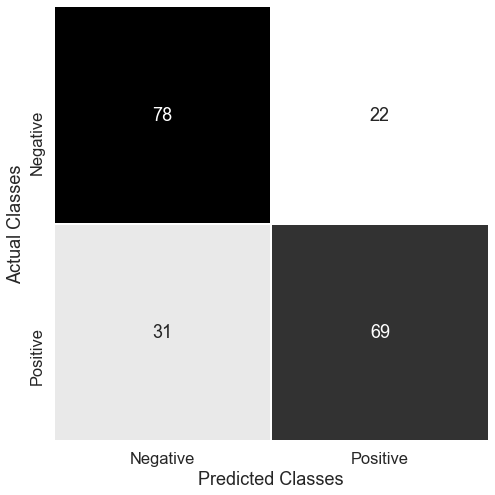

In [98]:
confusion_mat('Greys')

In [99]:
print('\nClassification Report\n')
print(classification_report(y_test,pred_dtg))


Classification Report

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.76      0.69      0.72       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



In [113]:
a2 = round(accuracy_score(y_test,pred_dtg)*100,4)
e2 = round(100-accuracy_score(y_test,pred_dtg)*100,4)
print('Accuracy:',a2)
print('Error:',e2)

Accuracy: 73.5
Error: 26.5


## 7.3 SGD Classifier

In [101]:
from sklearn.linear_model import SGDClassifier

In [102]:
clf = SGDClassifier( penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [103]:
pred_sgd = clf.predict(X_test)

In [104]:
print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(pred_sgd.tolist()[:20])

first 20 actual labels
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
first 20 predicted labels
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]


In [105]:
def confusion_mat(color):
    cof=confusion_matrix(y_test, pred_sgd)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"]);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

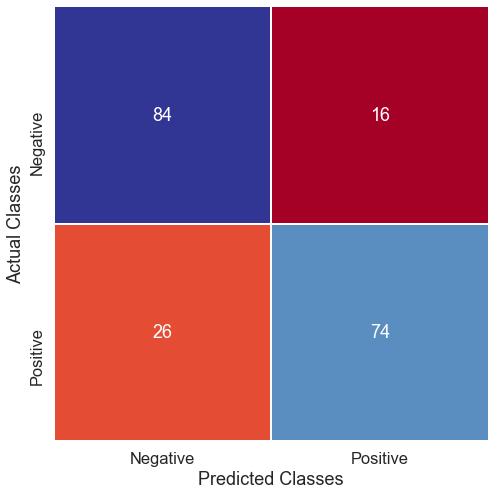

In [107]:
confusion_mat('RdYlBu')

In [108]:
print('\nClassification Report\n')
print(classification_report(y_test,pred_sgd))


Classification Report

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.82      0.74      0.78       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [114]:
a3 = round(accuracy_score(y_test,pred_sgd)*100,4)
e3 = round(100-accuracy_score(y_test,pred_sgd)*100,4)
print('Accuracy:',a3)
print('Error:',e3)

Accuracy: 79.0
Error: 21.0


# 8. Comparison of Accuracies of Different Models for Dtrain and Dtest

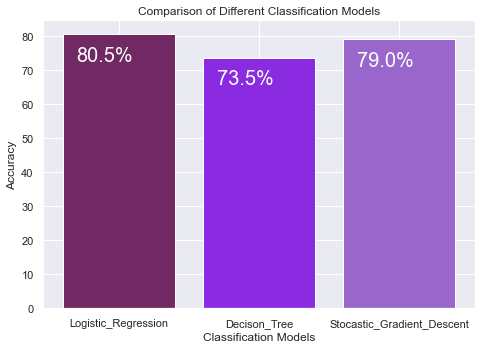

In [115]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Logistic_Regression","Decison_Tree","Stocastic_Gradient_Descent"]
Accuracy=[a1,a2,a3]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-7.8, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();

#### Conclusion: Here Logistic Regressions gives good accuracy than Decision Tree and SGD classifier